In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv('loans_dataset.csv')
df.head()

,Customer ID,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
0,945780,Miah,19,S,2,Unemployed,UK,0,TA3 7SH,45500,Rent,1,13234,Paid
1,747989,Hollis,66,F,13,Unemployed,UK,1080,WV6 8SU,18000,Own,0,5561,Paid
2,790344,Barker,48,F,4,Self Employed,UK,3690,BT15 5HG,47500,Rent,1,28288,Paid
3,597668,Titford,67,F,47,Self Employed,UK,6560,GU10 3NH,36000,Mortgage,0,30199,Paid
4,794971,Berry,70,M,8,Self Employed,UK,9100,GL6 6UB,50500,Own,0,35078,Paid


### Display Statistics Summary

In [3]:
print(df.describe())

        Customer ID          Age  Years at address  Current debt  \
count  2.000000e+03  2000.000000       2000.000000   2000.000000   
mean   8.370775e+05    52.912000         18.525500   3309.325000   
std    1.607633e+05    20.991226         23.201541   2980.628888   
min    5.555740e+05    17.000000          1.000000      0.000000   
25%    6.929298e+05    35.000000          5.000000    650.000000   
50%    8.405715e+05    53.000000         13.000000   2450.000000   
75%    9.778380e+05    70.000000         28.000000   5512.500000   
max    1.110985e+06    89.000000        560.000000   9980.000000   

              Income        CCJs   Loan amount  
count    2000.000000  2000.00000   2000.000000  
mean    38319.000000     1.05250  18929.627500  
std     12786.506027     2.46856  12853.188862  
min      3000.000000     0.00000     13.000000  
25%     30000.000000     0.00000   8010.000000  
50%     40000.000000     1.00000  17148.000000  
75%     48000.000000     2.00000  27913.5000

In [4]:
df.shape

(2000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        2000 non-null   int64 
 1   Fictional Surname  2000 non-null   object
 2   Age                2000 non-null   int64 
 3   Gender             2000 non-null   object
 4   Years at address   2000 non-null   int64 
 5   Employment status  2000 non-null   object
 6   Country            2000 non-null   object
 7   Current debt       2000 non-null   int64 
 8   Postcode           2000 non-null   object
 9   Income             2000 non-null   int64 
 10  Own home           2000 non-null   object
 11  CCJs               2000 non-null   int64 
 12  Loan amount        2000 non-null   int64 
 13  Outcome            2000 non-null   object
dtypes: int64(7), object(7)
memory usage: 218.9+ KB


### Drop ID and Fictional Name Columns

In [6]:
# First make a copy of the dataset
data = df.copy()
data.drop(columns=['Customer ID', 'Fictional Surname'], axis=1, inplace=True)

### How many people paid or defaulted their loans

In [7]:
data.groupby('Outcome')['Outcome'].count()

Outcome
Defaulted     882
Paid         1118
Name: Outcome, dtype: int64

### How many people own, rent or mortagage a house?

In [8]:
data.groupby('Own home').count()

,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,CCJs,Loan amount,Outcome
Own home,,,,,,,,,,,
Mortgage,677,677,677,677,677,677,677,677,677,677,677
Own,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031
Rent,292,292,292,292,292,292,292,292,292,292,292


### Create Group Ages

In [9]:
data['Age Group'] = pd.cut(data['Age'], bins=[10, 30, 50, 70, 90])

### How many people paid/defaulted by age group?

In [10]:
data.groupby(['Age Group','Outcome']).count()

Age  Gender  Years at address  Employment status  \
Age Group Outcome                                                       
(10, 30]  Defaulted  187     187               187                187   
          Paid       207     207               207                207   
(30, 50]  Defaulted  248     248               248                248   
          Paid       287     287               287                287   
(50, 70]  Defaulted  228     228               228                228   
          Paid       344     344               344                344   
(70, 90]  Defaulted  219     219               219                219   
          Paid       280     280               280                280   

                     Country  Current debt  Postcode  Income  Own home  CCJs  \
Age Group Outcome                                                              
(10, 30]  Defaulted      187           187       187     187       187   187   
          Paid           207           207       207     207       207   207   
(30, 50]  Defaulted      248           248       248     248       248   248   
          Paid           287           287       287     287       287   287   
(50, 70]  Defaulted      228           228       228     228       228   228   
          Paid           344           344       344     344       344   344   
(70, 90]  Defaulted      219           219       219     219       219   219   
          Paid           280           280       280     280       280   280   

                     Loan amount  
Age Group Outcome                 
(10, 30]  Defaulted          187  
          Paid               207  
(30, 50]  Defaulted          248  
          Paid               287  
(50, 70]  Defaulted          228  
          Paid               344  
(70, 90]  Defaulted          219  
          Paid               280

### How many people own, rent or mortgage a home by age group?

In [11]:
data.groupby(['Age Group', 'Own home'])['Own home'].count()

Age Group  Own home
(10, 30]   Mortgage    148
           Own         181
           Rent         65
(30, 50]   Mortgage    176
           Own         283
           Rent         76
(50, 70]   Mortgage    184
           Own         302
           Rent         86
(70, 90]   Mortgage    169
           Own         265
           Rent         65
Name: Own home, dtype: int64

### Rename Columns

In [12]:
data.rename({'Years at address': 'Years at Address', 'Employment status': 'Employment Status', 'Current debt': 'Current Debt', 'Own home': 'Housing', 'Loan amount': 'Loan Amount'}, axis=1, inplace=True)
data

,Age,Gender,Years at Address,Employment Status,Country,Current Debt,Postcode,Income,Housing,CCJs,Loan Amount,Outcome,Age Group
0,19,S,2,Unemployed,UK,0,TA3 7SH,45500,Rent,1,13234,Paid,"(10, 30]"
1,66,F,13,Unemployed,UK,1080,WV6 8SU,18000,Own,0,5561,Paid,"(50, 70]"
2,48,F,4,Self Employed,UK,3690,BT15 5HG,47500,Rent,1,28288,Paid,"(30, 50]"
3,67,F,47,Self Employed,UK,6560,GU10 3NH,36000,Mortgage,0,30199,Paid,"(50, 70]"
4,70,M,8,Self Employed,UK,9100,GL6 6UB,50500,Own,0,35078,Paid,"(50, 70]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,F,4,Self Employed,UK,2900,PR4 4RF,22500,Own,1,15725,Paid,"(50, 70]"
1996,24,F,7,Self Employed,UK,5130,PR7 5PA,38000,Own,0,35911,Paid,"(10, 30]"
1997,34,M,5,Unemployed,UK,6530,RG18 9PH,41500,Own,2,6874,Paid,"(30, 50]"
1998,52,F,2,Employed,UK,930,RG40 2JX,32500,Own,0,5412,Paid,"(50, 70]"


### Numerical Variables/Features

In [13]:
numerical_features = [feature for feature in data.columns if data[feature].dtype not in ['object', 'category']]
numerical_features

['Age', 'Years at Address', 'Current Debt', 'Income', 'CCJs', 'Loan Amount']

In [14]:
data[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               2000 non-null   int64
 1   Years at Address  2000 non-null   int64
 2   Current Debt      2000 non-null   int64
 3   Income            2000 non-null   int64
 4   CCJs              2000 non-null   int64
 5   Loan Amount       2000 non-null   int64
dtypes: int64(6)
memory usage: 93.9 KB


#### Discrete Numerical Features
* Graphs normally used with discrete variables: Bar Chart, Box-and-Wisker Plots

In [15]:
discrete_features = [feature for feature in numerical_features if feature not in 'Age']
print(f'Number of discrete features: {len(discrete_features)}')

Number of discrete features: 5


#### Continuous Numerical Features
* Graphs used with continuous features: Line Graph, Histograms

In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['Age']

#### Handling Missing Values

In [17]:
numerical_features_with_na = [feature for feature in numerical_features if data[feature].isnull().sum() > 1]
numerical_features_with_na

[]

#### Depict Relationship Between Variables

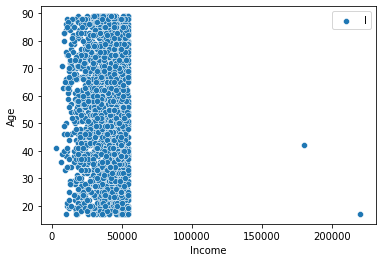

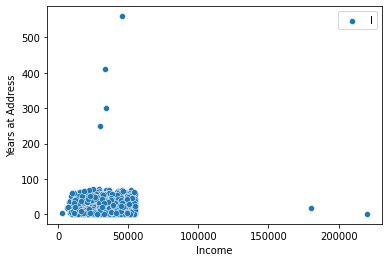

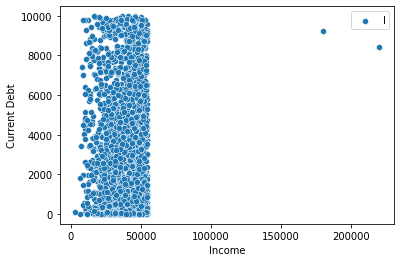

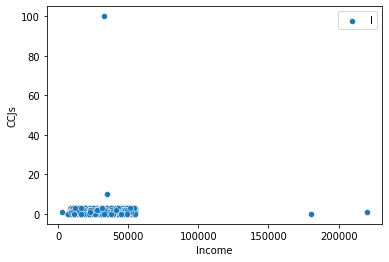

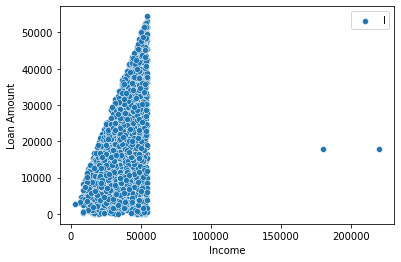

In [18]:
# Scatter plot is used to dipict relationship between two numerical variables
for feature in numerical_features:
    if feature not in 'Income':
        sns.scatterplot(x=data['Income'], y=feature, data=data)
        plt.xlabel('Income')
        plt.ylabel(feature)
        plt.legend(f'Income vs {feature}')
        plt.show()




#### Identify Outliers

In [19]:
# Run summary statistics to detect outliers
data[numerical_features].describe()


,Age,Years at Address,Current Debt,Income,CCJs,Loan Amount
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,52.912000,18.525500,3309.325000,38319.000000,1.05250,18929.627500
std,20.991226,23.201541,2980.628888,12786.506027,2.46856,12853.188862
min,17.000000,1.000000,0.000000,3000.000000,0.00000,13.000000
25%,35.000000,5.000000,650.000000,30000.000000,0.00000,8010.000000
50%,53.000000,13.000000,2450.000000,40000.000000,1.00000,17148.000000
75%,70.000000,28.000000,5512.500000,48000.000000,2.00000,27913.500000
max,89.000000,560.000000,9980.000000,220000.000000,100.00000,54455.000000


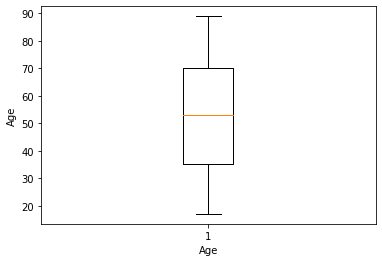

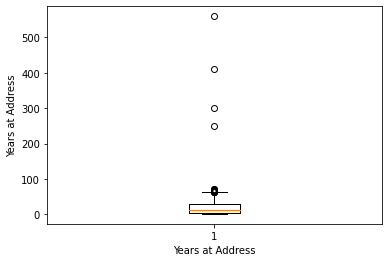

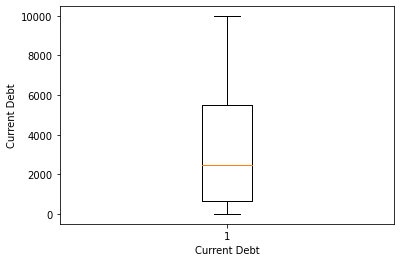

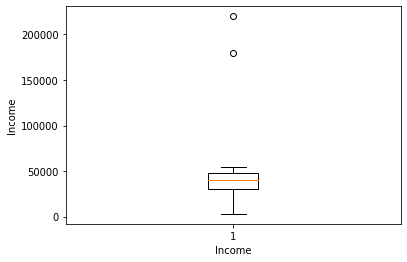

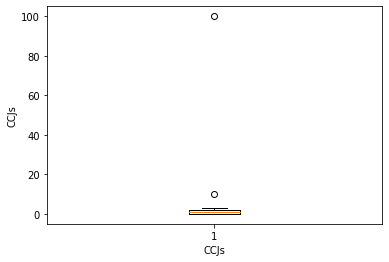

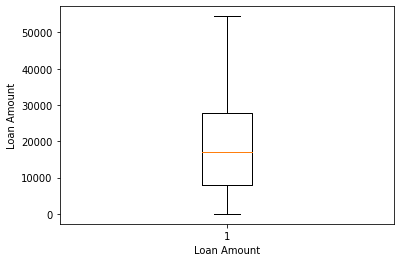

In [20]:
# Detect outliers by using box plot
for feature in numerical_features:
    plt.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel(feature)
    plt.show()

In [21]:
# Show points where there are outliers
(data[numerical_features].skew() > 1) | (data[numerical_features].skew() < -1)

Age                 False
Years at Address     True
Current Debt        False
Income               True
CCJs                 True
Loan Amount         False
dtype: bool

#### Treat Outliers
##### We will use quantile based flooring and capping. In this technique we will do flooring using the P10 for the lower values and do capping using the P90 for the higher values

In [22]:
for feature in numerical_features:
    if (data[feature].skew() > 1) | (data[feature].skew() < -1):
        P10 = data[feature].quantile(0.10)
        P90 = data[feature].quantile(0.90)
        data[feature] = np.where(data[feature] < P10, P10, data[feature])
        data[feature] = np.where(data[feature] > P90, P90, data[feature])
data

,Age,Gender,Years at Address,Employment Status,Country,Current Debt,Postcode,Income,Housing,CCJs,Loan Amount,Outcome,Age Group
0,19,S,2.0,Unemployed,UK,0,TA3 7SH,45500.0,Rent,1.0,13234,Paid,"(10, 30]"
1,66,F,13.0,Unemployed,UK,1080,WV6 8SU,21000.0,Own,0.0,5561,Paid,"(50, 70]"
2,48,F,4.0,Self Employed,UK,3690,BT15 5HG,47500.0,Rent,1.0,28288,Paid,"(30, 50]"
3,67,F,42.0,Self Employed,UK,6560,GU10 3NH,36000.0,Mortgage,0.0,30199,Paid,"(50, 70]"
4,70,M,8.0,Self Employed,UK,9100,GL6 6UB,50500.0,Own,0.0,35078,Paid,"(50, 70]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,F,4.0,Self Employed,UK,2900,PR4 4RF,22500.0,Own,1.0,15725,Paid,"(50, 70]"
1996,24,F,7.0,Self Employed,UK,5130,PR7 5PA,38000.0,Own,0.0,35911,Paid,"(10, 30]"
1997,34,M,5.0,Unemployed,UK,6530,RG18 9PH,41500.0,Own,2.0,6874,Paid,"(30, 50]"
1998,52,F,2.0,Employed,UK,930,RG40 2JX,32500.0,Own,0.0,5412,Paid,"(50, 70]"


In [23]:
data.describe()

,Age,Years at Address,Current Debt,Income,CCJs,Loan Amount
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,52.912000,16.969500,3309.325000,38565.00000,1.000500,18929.627500
std,20.991226,13.582298,2980.628888,10479.58424,1.075676,12853.188862
min,17.000000,2.000000,0.000000,21000.00000,0.000000,13.000000
25%,35.000000,5.000000,650.000000,30000.00000,0.000000,8010.000000
50%,53.000000,13.000000,2450.000000,40000.00000,1.000000,17148.000000
75%,70.000000,28.000000,5512.500000,48000.00000,2.000000,27913.500000
max,89.000000,42.000000,9980.000000,52000.00000,3.000000,54455.000000


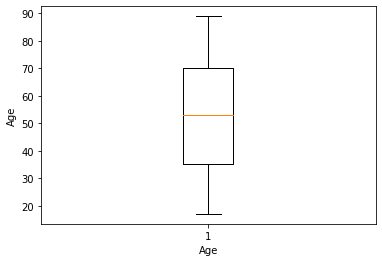

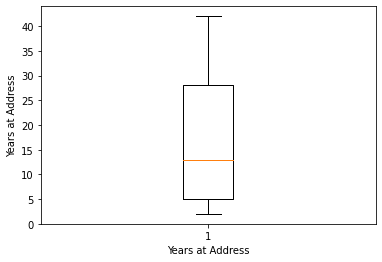

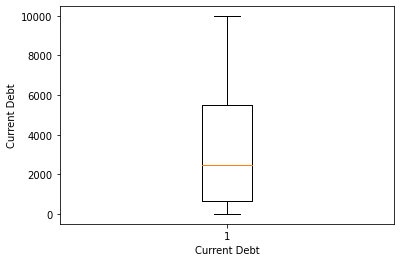

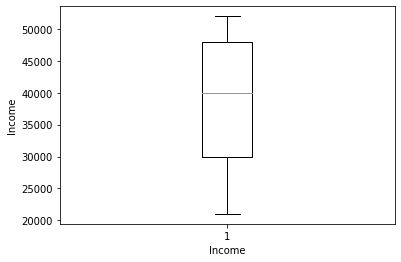

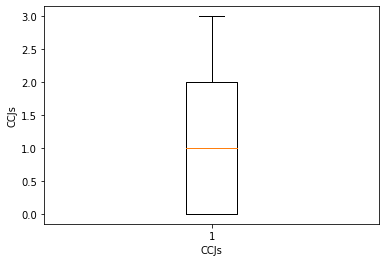

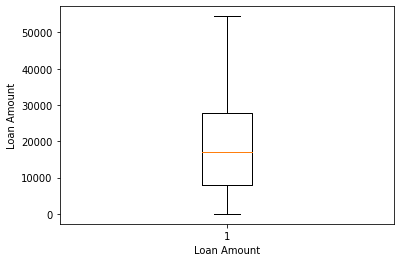

In [24]:
for feature in numerical_features:
    plt.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel(feature)
    plt.show()

In [25]:
categorical_features = [feature for feature in data.columns if feature not in numerical_features+['Outcome', 'Age Group']]
data[categorical_features]

,Gender,Employment Status,Country,Postcode,Housing
0,S,Unemployed,UK,TA3 7SH,Rent
1,F,Unemployed,UK,WV6 8SU,Own
2,F,Self Employed,UK,BT15 5HG,Rent
3,F,Self Employed,UK,GU10 3NH,Mortgage
4,M,Self Employed,UK,GL6 6UB,Own
...,...,...,...,...,...
1995,F,Self Employed,UK,PR4 4RF,Own
1996,F,Self Employed,UK,PR7 5PA,Own
1997,M,Unemployed,UK,RG18 9PH,Own
1998,F,Employed,UK,RG40 2JX,Own


#### Check for NAN values in categorical features

In [26]:
categorical_features_with_na = [feature for feature in categorical_features if data[feature].isnull().sum() > 1]
categorical_features_with_na

Number of categories for Gender : 10
Number of categories for Employment Status : 4
Number of categories for Country : 4
Number of categories for Postcode : 1971
Number of categories for Housing : 3


In [27]:
for feature in categorical_features:
    print(f'Number of categories for {feature} : {data[feature].nunique()}')


Number of categories for Gender : 10
Number of categories for Employment Status : 4
Number of categories for Country : 4
Number of categories for Postcode : 1971
Number of categories for Housing : 3


#### Handle missing values in categorical features

In [32]:
# Replace inconsistent value format with correct one
data['Gender'] = data['Gender'].replace(['Female', 'Male'], ['F', 'M'])

# Replace wrong entries with NaN first
data['Gender'] = data['Gender'].replace(['H', 'N', '1', 'S', 'D', '0'], np.nan)

# Replace NaN values with the most frequent value
data['Gender'] = data['Gender'].fillna(data['Gender'].mode().iloc[0])
data['Gender'].value_counts(dropna=False)

M    1029
F     971
Name: Gender, dtype: int64